In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = '/Users/joyhe208/Desktop/Tree-Plenish/TreeRequests/'
files = os.listdir(path)

Text(0, 0.5, 'Frequency')

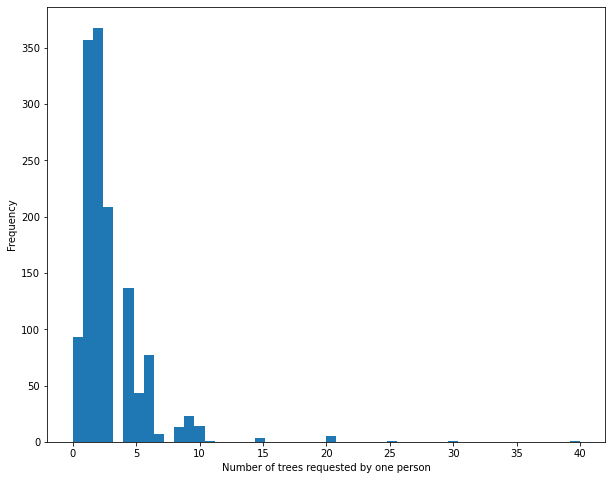

In [4]:
plt.figure(figsize=(10,8))
allSchools = pd.DataFrame(columns=['Average Trees Requested By One Requester', 'Total Trees Requested','Max Trees Requested By One Requester', 'Median Trees Requested By One Requester'])
treesRequestedAllSchools=[]
for file in files:

    if "Tree Request" in file:
       
        # Load dataframe from html file
        df = pd.read_html(path + file)[0]

        # Get the index of total trees and submit times for that sheet
        treeInd = np.where(df.iloc[[0]].values == "score")[-1][0]
        dateInd = np.where(df.iloc[[0]].values == "Submitted At")[-1][0]

        # Get list of trees requested, adding a 0 at the first day
        treesRequested = np.append([0],df[df.columns[treeInd]][2:].values.astype(int))
        
        #Get average, max, and median tree requests from one requester for the given school
        avgNumTreeRequests = np.average(treesRequested)
        maxTreeRequests = np.max(treesRequested)
        medTreeRequests = np.median(treesRequested)
        totalTrees = np.sum(treesRequested)
        
        #add it all to one dataframe
        thisSchool = pd.DataFrame([[avgNumTreeRequests, totalTrees, maxTreeRequests, medTreeRequests]], columns=['Average Trees Requested By One Requester','Total Trees Requested', 'Max Trees Requested By One Requester','Median Trees Requested By One Requester'])
        
        #append it to the all-schools dataframe
        allSchools = allSchools.append(thisSchool)
        
        #append each individual score to a dataframe that will include data from all schools
        for score in treesRequested:
            treesRequestedAllSchools.append(score)


plt.hist(treesRequestedAllSchools, bins=50)
plt.xlabel('Number of trees requested by one person')
plt.ylabel('Frequency')

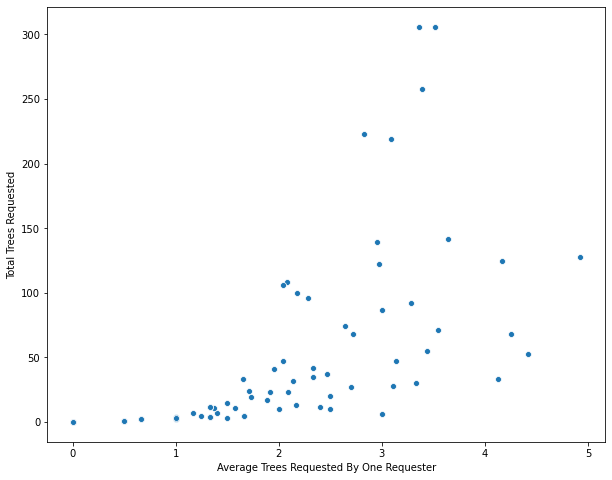

In [5]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = allSchools, x = 'Average Trees Requested By One Requester',y='Total Trees Requested')

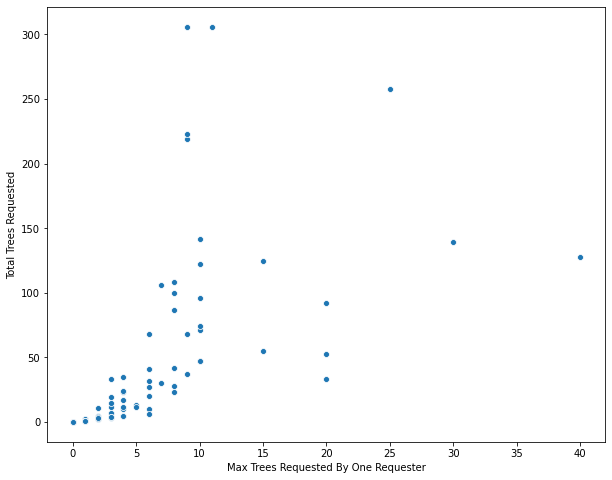

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = allSchools, x = 'Max Trees Requested By One Requester',y='Total Trees Requested',)

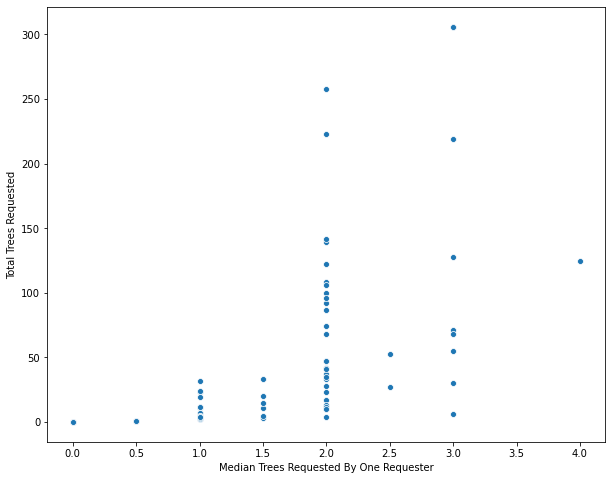

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = allSchools, x = 'Median Trees Requested By One Requester',y='Total Trees Requested')